In [1]:
%matplotlib inline 

In [2]:
import matplotlib.pyplot as plt
from sympy import symbols,exp, pi, lambdify
from numpy import linspace
from matplotlib.ticker import *

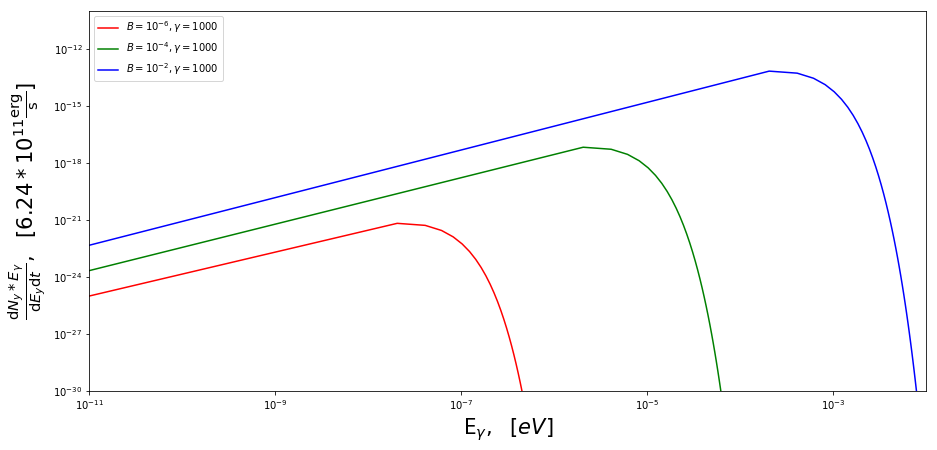

In [18]:
############# defining constants

e = 4.8032 * 10**-10  #Electron charge, g**(1/2)*cm**(3/2)*s**-1
h = 6.5821* 10**-16   #Planck constants h bar, Ev*s
m = 9.1095 * 10**-28  #Electron mass, g
c = 2.9979 * 10**10   #Light speed, cm*s-1


######################

#used symbols for non-numerical caluclations
x,B,gamma,Eg = symbols("x B gamma Eg")

#B Magnetic induction, g**(1/2)*cm**(-1/2)*s**(-1)
#gamma Lorenz factor, no measurment


##### Defining functions from article
F= 2.15*x**(1/3)*(1+3.06*x)**(1/6)*(1+0.884*x**(2/3)+0.471*x**(4/3))*exp(-x)/(1+1.64*x**(2/3)+0.974*x**(4/3)) 
Ec = 3*e*h*B*gamma**2/(2*m*c)  
K=3**0.5*e**3*B*Eg/(2*pi*m*c**2*h)*F.subs(x,Eg/Ec) ###is dN*Eg/d(Eg)dt
#########

#Plots for fixed B and gamma
"""Code in below 'converts' Sympy expresions to numpy arrays for plotting, because matplotlib is plotting
numpy arrays"""

###################

k1 = K.subs({B:10**-6,gamma:1000}) #subtitute B and gamma for given values
lam_k1 = lambdify(Eg,k1,modules=["numpy"]) ##for using numerical expresions lambdify function
Eg1_values = linspace(10**-11,10**-6) #E_gamma values
k1_values = lam_k1(Eg1_values) #K function values at given E-gammas

####################

k2 = K.subs({B:10**-4,gamma:1000})
lam_k2 = lambdify(Eg,k2,modules=["numpy"])
Eg2_values = linspace(10**-11,10**-4)
k2_values = lam_k2(Eg2_values) 

####################

k3 = K.subs({B:10**-2,gamma:1000})
lam_k3 = lambdify(Eg,k3,modules=["numpy"])
Eg3_values = linspace(10**-11,10**-2)
k3_values = lam_k3(Eg3_values) 

########################

#plotting functions

fig,ax = plt.subplots(figsize = (15,7))
label1 = r'$B = 10 ^{-6}, \gamma = 1000$'
label2 = r'$B = 10^{-4} , \gamma = 1000$'
label3 = r'$B = 10^{-2} , \gamma = 1000$'
xtext = r'$ \mathtt{E}_\gamma ,\ \ [eV]$'
ytext = r'$\frac{\mathregular{d} N_y * E_\gamma}{\mathregular{d} E_y \mathregular{d} t }, \ \ \mathregular{[6.24*10^{11}\frac{erg}{s}]} $'


ax.loglog(Eg1_values,k1_values,color = 'red',label = label1)
ax.loglog(Eg2_values,k2_values,color = 'g',label = label2)
ax.loglog(Eg3_values,k3_values,color = 'b',label = label3)
ax.legend(loc = "best")

ax.set_xlabel(xtext,fontsize = 21)
ax.set_ylabel(ytext,fontsize = 21)

ax.set_xlim(10**-11,10**-2)
ax.set_ylim(10**-30,10**-10)

plt.savefig("/home/mher/Desktop/Bessel.pdf",dpi = 400)
plt.show()